In [367]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [368]:
df = pd.read_csv('EDA.csv')
df.head()

,ID объявления,rooms,types,adress,"Площадь, м2",Парковка,Цена,tel_number,other,Ремонт,...,bathrooms,has_trash_chute,Floor,Wall material,floor_num,total_floor,metro_numeric,parking_numeric,Floor_category,floor_type
0,273973191,3,Квартира,"Москва, Новинский бульвар, 18С1",120.0,открытая,"130000.0 руб./ За месяц, Залог - 130000 руб., ...",+79153429055,Лот 71833. Евгений Николаев.\n\nБонус агенту 1...,Евроремонт,...,1,0,5/10,Сталинский,5,10,103000.000000,52201.687642,Средний,1
1,273999490,3,Квартира,"Москва, Новинский бульвар, 7",80.0,не указано,"100000.0 руб./ За месяц, Залог - 110000 руб., ...",+79651152137,Срочно сдаётся 3-комнатная квартира в центре с...,Евроремонт,...,1,0,4/8,Кирпичный,4,8,103000.000000,48775.181754,Средний,1
2,274995950,2,Квартира,"Москва, улица Новый Арбат, 15",30.0,не указано,"120000.0 руб./ За месяц, Залог - 120000 руб., ...",+79623647031,Лот: 86483. БОНУС! Предлагаются эксклюзивные...,Евроремонт,...,1,0,19/26,не указано,19,26,107142.857143,48775.181754,Средний,1
3,271265359,2,Квартира,"Москва, улица Арбат, 45/24",60.0,наземная,"90000.0 руб./ За месяц, Залог - 90000 руб., Ср...","+79663231130, +79099269384",ID 37037: В аренду предлагается светлая двухк...,Евроремонт,...,1,0,5/6,не указано,5,6,103000.000000,49131.741222,Средний,1
4,273779074,2,Квартира,"Москва, Большой Николопесковский переулок, 3",60.0,не указано,"120000.0 руб./ За месяц, Залог - 120000 руб., ...",+79647810140,Без комиссии для арендатора. В историческом це...,не указано,...,1,0,3/6,Кирпичный,3,6,103000.000000,48775.181754,Средний,1


#### Удаление пустых строк

In [369]:
df = df.dropna()

#### Проверка на полные дубликаты в ДФ

In [370]:
print("Полные дубликаты:", df.duplicated().sum())

Полные дубликаты: 0


#### Проверка на дубликаты по адресу и площади

In [371]:
print("Дубликаты по адресу и площади:", df.duplicated(subset=['adress', 'Площадь, м2']).sum())

Дубликаты по адресу и площади: 685


#### Проверка сколько дубликатов по ключевым столбцам 

In [372]:
duplicates = df.duplicated(subset=['adress', 'Площадь, м2', 'Price_per_month', 'rooms'])
print(f"Найдено дубликатов: {duplicates.sum()}")

Найдено дубликатов: 294


#### Удаление дубликатов, оставляя первое вхождение

In [373]:
df = df.drop_duplicates(subset=['adress', 'Площадь, м2', 'Price_per_month', 'rooms'], keep='first')
df.columns

Index(['ID  объявления', 'rooms', 'types', 'adress', 'Площадь, м2', 'Парковка',
       'Цена', 'tel_number', 'other', 'Ремонт', 'Площадь комнат, м2', 'Окна',
       'Можно с детьми/животными', 'Дополнительно', 'Название ЖК',
       'Серия дома', 'Высота потолков, м', 'Лифт', 'link', 'Price_per_month',
       'type_elevator', 'Count_elevators', 'metro_st', 'metro_time', 'balcon',
       'loggia', 'bathrooms', 'has_trash_chute', 'Floor', 'Wall material',
       'floor_num', 'total_floor', 'metro_numeric', 'parking_numeric',
       'Floor_category', 'floor_type'],
      dtype='object')

#### Итоговое количество строк в ДФ

In [374]:
print(f"Количество строк после удаления дубликатов: {len(df)}")

Количество строк после удаления дубликатов: 12224


#### Удаление столбцов после предобработки

In [375]:
df = df.drop(columns=['types', 'tel_number', 'other', 'Цена', 'Площадь комнат, м2', 'Дополнительно', 'Название ЖК', 'Лифт'])

In [376]:
df

,ID объявления,rooms,adress,"Площадь, м2",Парковка,Ремонт,Окна,Можно с детьми/животными,Серия дома,"Высота потолков, м",...,bathrooms,has_trash_chute,Floor,Wall material,floor_num,total_floor,metro_numeric,parking_numeric,Floor_category,floor_type
0,273973191,3,"Москва, Новинский бульвар, 18С1",120.0,открытая,Евроремонт,На улицу,Можно с животными,Не указано,3.00,...,1,0,5/10,Сталинский,5,10,103000.000000,52201.687642,Средний,1
3,271265359,2,"Москва, улица Арбат, 45/24",60.0,наземная,Евроремонт,На улицу и двор,Можно с детьми,Не указано,3.20,...,1,0,5/6,не указано,5,6,103000.000000,49131.741222,Средний,1
5,274217247,3,"Москва, улица Арбат, 31",103.0,не указано,не указано,На улицу и двор,Можно с детьми,Индивидуальный проект,3.80,...,1,0,2/3,Кирпичный,2,3,103000.000000,48775.181754,Средний,1
6,274199925,3,"Москва, улица Арбат, 31",100.0,не указано,не указано,Во двор,Можно с детьми,Не указано,2.71,...,1,0,2/3,не указано,2,3,107142.857143,48775.181754,Средний,1
9,274431438,3,"Москва, Карманицкий переулок, 3",65.0,наземная,Евроремонт,На улицу и двор,"Можно с детьми, Можно с животными",Не указано,3.20,...,1,0,7/7,не указано,7,7,103000.000000,49131.741222,Последний,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19278,274551795,2,"Москва, улица Юлиана Семенова, 8к1, ш. Боровск...",39.0,наземная,Евроремонт,Во двор,Можно с детьми,Не указано,2.70,...,1,0,5/19,Монолитный,5,19,44965.811966,49131.741222,Средний,1
19281,274938405,1,"Москва, Производственная улица, 8к1, ш. Боровс...",41.0,не указано,Евроремонт,Во двор,Можно с детьми,Не указано,2.85,...,1,0,2/19,Монолитный,2,19,44965.811966,48775.181754,Средний,1
19286,240644689,2,"Москва, Производственная улица, 10к2, ш. Боров...",54.0,не указано,Евроремонт,На улицу,Можно с детьми,Не указано,2.85,...,1,0,7/9,Монолитный,7,9,44965.811966,48775.181754,Средний,1
19288,273477956,3,"Москва, улица Главмосстроя, 5, ш. Боровское (4...",75.0,наземная,Косметический,На улицу и двор,Можно с детьми,Не указано,2.50,...,1,1,4/23,Панельный,4,23,52413.028986,49131.741222,Средний,1


#### Переименование признаков

In [377]:
df.columns

Index(['ID  объявления', 'rooms', 'adress', 'Площадь, м2', 'Парковка',
       'Ремонт', 'Окна', 'Можно с детьми/животными', 'Серия дома',
       'Высота потолков, м', 'link', 'Price_per_month', 'type_elevator',
       'Count_elevators', 'metro_st', 'metro_time', 'balcon', 'loggia',
       'bathrooms', 'has_trash_chute', 'Floor', 'Wall material', 'floor_num',
       'total_floor', 'metro_numeric', 'parking_numeric', 'Floor_category',
       'floor_type'],
      dtype='object')

In [378]:
columns_mapping = {
    'rooms': 'Rooms',
    'adress': 'Address',
    'Площадь, м2': 'Area_sqm',
    'Парковка': 'Parking',
    'Ремонт': 'Repair',
    'Окна': 'Windows',
    'Можно с детьми/животными': 'Pets_Allowed',
    'Серия дома': 'House_Series',
    'Высота потолков, м': 'Ceiling_Height',
    'link': 'Property_Link',
    'Price_per_month': 'Price_per_month',
    'type_elevator': 'Elevator_Type',
    'Count_elevators': 'Count_elevators',
    'metro_st': 'Metro_Station',
    'metro_time': 'Metro_Distance',
    'balcon': 'Balcony',
    'loggia': 'Loggia',
    'bathrooms': 'Bathrooms',
    'has_trash_chute': 'Trash_Chute',
    'Floor': 'Floor',
    'floor_num': 'Floor_num',
    'total_floor': 'Total_floor',
    'Wall material': 'Wall_Material',
    'metro_numeric': 'Metro_Numeric',
    'parking_numeric': 'Parking_Numeric',
    'Floor_category': 'Floor_category',
    'floor_type': 'floor_type',
    'ID  объявления': 'ID'
}


selected_columns = [
    'rooms', 'adress', 'Площадь, м2', 'Парковка', 'Ремонт', 'Окна',
    'Можно с детьми/животными', 'Серия дома', 'Высота потолков, м', 'link',
    'Price_per_month', 'type_elevator', 'Count_elevators', 'metro_st', 'metro_time', 'balcon',
    'loggia', 'bathrooms', 'has_trash_chute', 'Floor', 'floor_num', 'total_floor', 'Wall material', 'metro_numeric', 
    'parking_numeric', 'Floor_category', 'floor_type', 'ID  объявления'
]

data = df[selected_columns].rename(columns=columns_mapping).set_index('ID')

In [379]:
data

,Rooms,Address,Area_sqm,Parking,Repair,Windows,Pets_Allowed,House_Series,Ceiling_Height,Property_Link,...,Bathrooms,Trash_Chute,Floor,Floor_num,Total_floor,Wall_Material,Metro_Numeric,Parking_Numeric,Floor_category,floor_type
ID,,,,,,,,,,,,,,,,,,,,,
273973191,3,"Москва, Новинский бульвар, 18С1",120.0,открытая,Евроремонт,На улицу,Можно с животными,Не указано,3.00,https://www.cian.ru/rent/flat/273973191,...,1,0,5/10,5,10,Сталинский,103000.000000,52201.687642,Средний,1
271265359,2,"Москва, улица Арбат, 45/24",60.0,наземная,Евроремонт,На улицу и двор,Можно с детьми,Не указано,3.20,https://www.cian.ru/rent/flat/271265359,...,1,0,5/6,5,6,не указано,103000.000000,49131.741222,Средний,1
274217247,3,"Москва, улица Арбат, 31",103.0,не указано,не указано,На улицу и двор,Можно с детьми,Индивидуальный проект,3.80,https://www.cian.ru/rent/flat/274217247,...,1,0,2/3,2,3,Кирпичный,103000.000000,48775.181754,Средний,1
274199925,3,"Москва, улица Арбат, 31",100.0,не указано,не указано,Во двор,Можно с детьми,Не указано,2.71,https://www.cian.ru/rent/flat/274199925,...,1,0,2/3,2,3,не указано,107142.857143,48775.181754,Средний,1
274431438,3,"Москва, Карманицкий переулок, 3",65.0,наземная,Евроремонт,На улицу и двор,"Можно с детьми, Можно с животными",Не указано,3.20,https://www.cian.ru/rent/flat/274431438,...,1,0,7/7,7,7,не указано,103000.000000,49131.741222,Последний,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274551795,2,"Москва, улица Юлиана Семенова, 8к1, ш. Боровск...",39.0,наземная,Евроремонт,Во двор,Можно с детьми,Не указано,2.70,https://www.cian.ru/rent/flat/274551795,...,1,0,5/19,5,19,Монолитный,44965.811966,49131.741222,Средний,1
274938405,1,"Москва, Производственная улица, 8к1, ш. Боровс...",41.0,не указано,Евроремонт,Во двор,Можно с детьми,Не указано,2.85,https://www.cian.ru/rent/flat/274938405,...,1,0,2/19,2,19,Монолитный,44965.811966,48775.181754,Средний,1
240644689,2,"Москва, Производственная улица, 10к2, ш. Боров...",54.0,не указано,Евроремонт,На улицу,Можно с детьми,Не указано,2.85,https://www.cian.ru/rent/flat/240644689,...,1,0,7/9,7,9,Монолитный,44965.811966,48775.181754,Средний,1


Общая информация:
<class 'pandas.core.frame.DataFrame'>
Index: 12224 entries, 273973191 to 274672243
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rooms            12224 non-null  int64  
 1   Address          12224 non-null  object 
 2   Area_sqm         12224 non-null  float64
 3   Parking          12224 non-null  object 
 4   Repair           12224 non-null  object 
 5   Windows          12224 non-null  object 
 6   Pets_Allowed     12224 non-null  object 
 7   House_Series     12224 non-null  object 
 8   Ceiling_Height   12224 non-null  float64
 9   Property_Link    12224 non-null  object 
 10  Price_per_month  12224 non-null  float64
 11  Elevator_Type    12224 non-null  object 
 12  Count_elevators  12224 non-null  int64  
 13  Metro_Station    12224 non-null  object 
 14  Metro_Distance   12224 non-null  int64  
 15  Balcony          12224 non-null  int64  
 16  Loggia           12224 non-null  

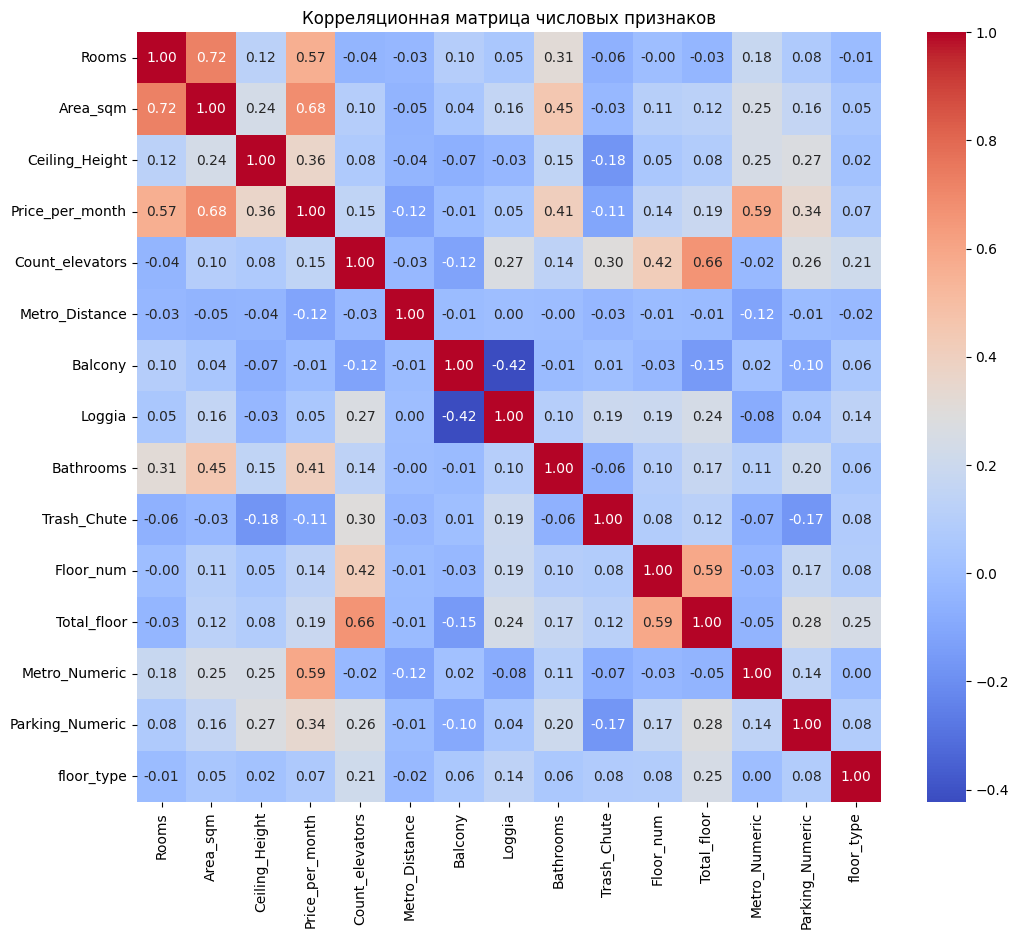

In [380]:
# --- 1. Общая информация ---
print("Общая информация:")
print(data.info())
print("\nСтатистика числовых признаков:")
print(data.describe())

# --- 2. Проверка пропусков ---
missing = data.isnull().sum().sort_values(ascending=False)
print("\nПропуски в данных:")
print(missing[missing > 0])

# --- 3. Корреляция числовых признаков ---
num_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
plt.figure(figsize=(12,10))
corr_matrix = data[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица числовых признаков")
plt.show()

#### Исходя их тепловой карты в качестве итоговых признаков принимаем те, что имеет коэффициент Пирсона по модулю больше 0.3

#### Для Price_per_month это: rooms (0.57), area_sqm (0.68), ceiling_height (0.36), bathrooms (0.41), metro_numeric (0.59), parking_numeric (0.34) 

#### Удаление оставшихся столбцов

In [381]:
data.columns

Index(['Rooms', 'Address', 'Area_sqm', 'Parking', 'Repair', 'Windows',
       'Pets_Allowed', 'House_Series', 'Ceiling_Height', 'Property_Link',
       'Price_per_month', 'Elevator_Type', 'Count_elevators', 'Metro_Station',
       'Metro_Distance', 'Balcony', 'Loggia', 'Bathrooms', 'Trash_Chute',
       'Floor', 'Floor_num', 'Total_floor', 'Wall_Material', 'Metro_Numeric',
       'Parking_Numeric', 'Floor_category', 'floor_type'],
      dtype='object')

In [382]:
data = data.drop(columns=['Address', 'Parking', 'Repair', 'Windows', 'Pets_Allowed', 'House_Series', 'Property_Link', 'Elevator_Type', 'Count_elevators', 'Metro_Station', 'Metro_Distance', 'Balcony', 'Loggia', 'Trash_Chute', 'Floor', 'Floor_num', 'Total_floor', 'Wall_Material', 'Floor_category', 'floor_type'])

In [383]:
data.columns

Index(['Rooms', 'Area_sqm', 'Ceiling_Height', 'Price_per_month', 'Bathrooms',
       'Metro_Numeric', 'Parking_Numeric'],
      dtype='object')

In [364]:
data

,Rooms,Area_sqm,Ceiling_Height,Price_per_month,Bathrooms,Metro_Numeric,Parking_Numeric
ID,,,,,,,
273973191,3,120.0,3.00,130000.0,1,103000.000000,52201.687642
271265359,2,60.0,3.20,90000.0,1,103000.000000,49131.741222
274217247,3,103.0,3.80,120000.0,1,103000.000000,48775.181754
274199925,3,100.0,2.71,115000.0,1,107142.857143,48775.181754
274431438,3,65.0,3.20,130000.0,1,103000.000000,49131.741222
...,...,...,...,...,...,...,...
274551795,2,39.0,2.70,48000.0,1,44965.811966,49131.741222
274938405,1,41.0,2.85,50000.0,1,44965.811966,48775.181754
240644689,2,54.0,2.85,60000.0,1,44965.811966,48775.181754
